<h1>Midterm task</h1>

You are given the data of customer satisfaction of the flight. This information could help to improve the customer satisfaction. Your main goal is to create a classifier and iterpret it, helping company to distinguish the features or patterns that could help to improve the customer satisfaction.

Your goal is to apply your knowledge in EDA, data preprocessing and model training. Also, you should provide complete explanation of your steps meaningful from the machine learning point of view. For example, *why do you use that particular plot?* *Why do you suppose that this model will work well with your data?*

---

To evaluate training results, use `StratifiedKFold` with 10 splits and `random_state = 42` and `balanced_accuracy_score`.  
Compute the average value over all the splits for test data.

---

**Grading schema:**
* EDA (25%) - *single feature plots*, *multiple feature plots*...
* Data Preprocessing (25%) - *feature engineering*, *feature selection*, *dimensionality reduction*...
* Model prediction quality (25%) - described above
* Comment/explanation quality (25%) - *just describe your ML-steps*

---

**Predict:** `satisfaction`  


In [55]:
!gdown 13nO86N0aLnT5dN54rhPfI1srbSGamdDO -O airline_data.csv

Downloading...
From: https://drive.google.com/uc?id=13nO86N0aLnT5dN54rhPfI1srbSGamdDO
To: /content/airline_data.csv
100% 12.0M/12.0M [00:00<00:00, 167MB/s]


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

Analyze the data using various plots considered during the course. Use various plots, preferrably all of them. (25% – EDA)

Explain, what information are you going to explore by each of the plots you use, what conclusions do you draw from the dependenices you see? (5% – Explain)

In [57]:
airline_data = pd.read_csv('./airline_data.csv')
airline_data.head()

satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0               0              2  ...               2                       3   
1               0              3  ...               2                       3   
2               0              3  ...               2                       2   
3               0              3  ...               3                       1   
4               0              3  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 22 columns]

In [58]:
airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [59]:
# sns.heatmap(np.cov(airline_data, rowvar=False))
# plt.title('Covariance matrix')
# plt.show()

<ipython-input-60-71ca767e961d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = np.abs(airline_data.corr())


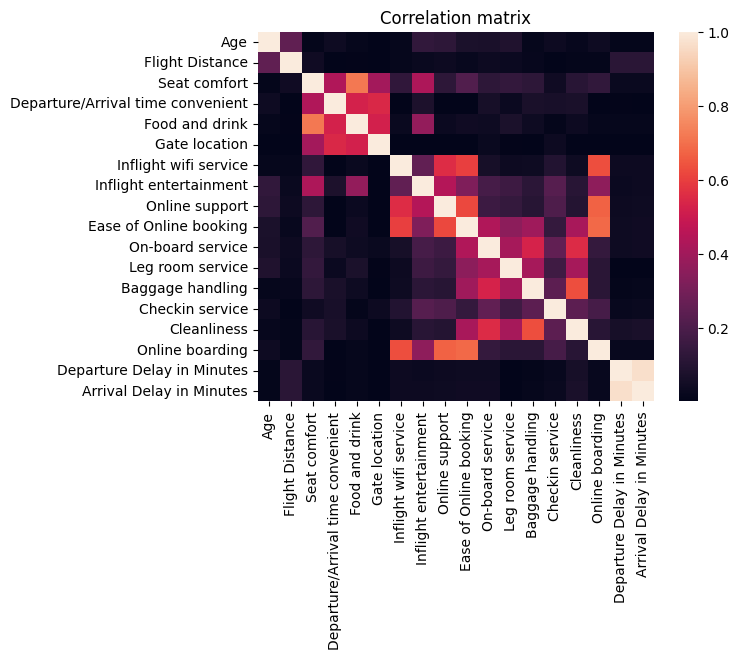

In [60]:
threshold = 0.0

corr_matrix = np.abs(airline_data.corr())
mask = corr_matrix >= threshold

sns.heatmap(corr_matrix, mask=~mask)
plt.title('Correlation matrix')
plt.show()

From the correlation matrix we see that:

Let's specify the features that is correlated with each other.

1) `Seat comfort`, `Departure/Arrival time convenient`, `Gate location` and `Food and Drink`.

2) `Inflight wifi service`, `Inflight entertainment`, `Online support` and `Ease of Online booking`, `Online boarding`.

3) `Ease of Online booking`, `On-board service`, `Leg room service`, `Baggage handling`, `Cleanliness`.

We also can say that there's a correlation between `Seat comfort`, `Inflight entartainment`. And `Food and drink` and `Inflight entartainment`




It is ordinal features, so we can use a boxplot to look at the distribution of those features a little bit closer.

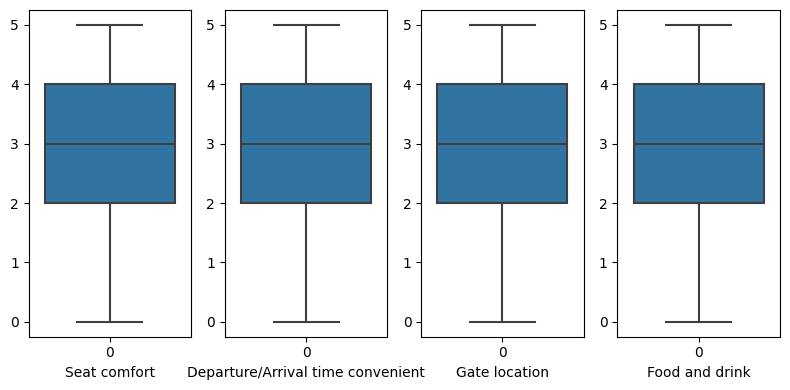

In [61]:
first_group = ['Seat comfort', 'Departure/Arrival time convenient', 'Gate location', 'Food and drink']


n_rows = 1
n_cols = len(first_group)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))

for i, feature in enumerate(first_group):
    ax = axes[i]

    sns.boxplot(airline_data[feature], ax=ax)
    ax.set_xlabel(feature)


plt.tight_layout()

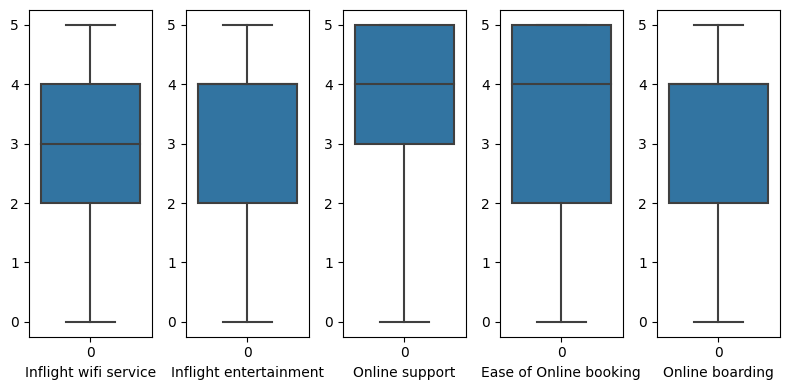

In [62]:
sec_group = ['Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'Online boarding']

n_rows = 1
n_cols = len(sec_group)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))

for i, feature in enumerate(sec_group):
    ax = axes[i]

    sns.boxplot(airline_data[feature], ax=ax)
    ax.set_xlabel(feature)


plt.tight_layout()


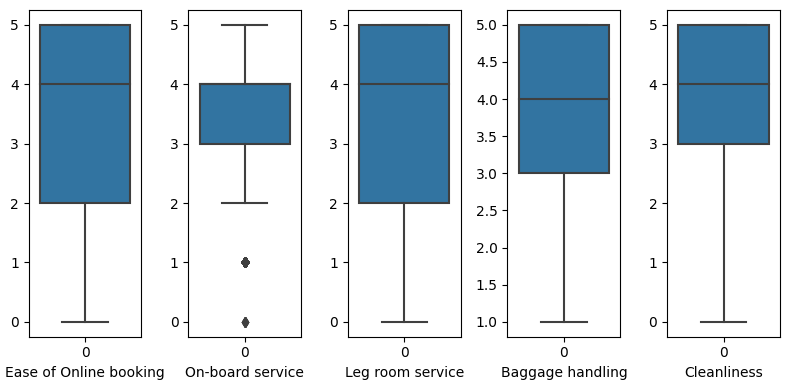

In [63]:
th_group = ['Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Cleanliness']

n_rows = 1
n_cols = len(th_group)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))

for i, feature in enumerate(th_group):
    ax = axes[i]

    sns.boxplot(airline_data[feature], ax=ax)
    ax.set_xlabel(feature)


plt.tight_layout()

We also could see that there's a high correlation between `Arrival Delay in Minutes` and `Departure Delay in Minutes`
(well, because we can't departure an airplane, that hasn't arrived yet - probably **one of the features should be droped)**

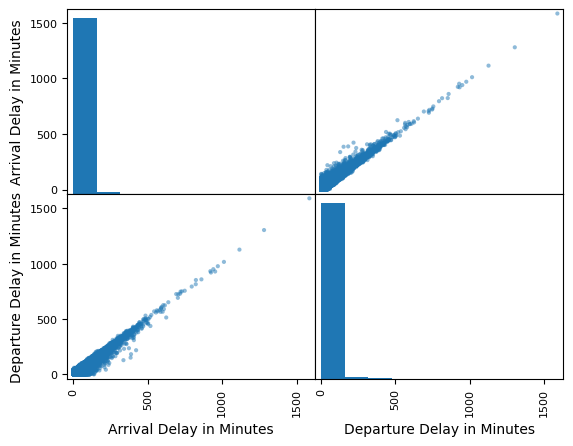

In [64]:
from pandas.plotting import scatter_matrix

scatter_matrix(airline_data[['Arrival Delay in Minutes', 'Departure Delay in Minutes']])
plt.show()

In [65]:
airline_data = airline_data.drop({'Arrival Delay in Minutes', 'Inflight wifi service'}, axis=1)

Better to drop Arrival Delay in Minutes since there's some number of missing values

Let's check the object features distribution

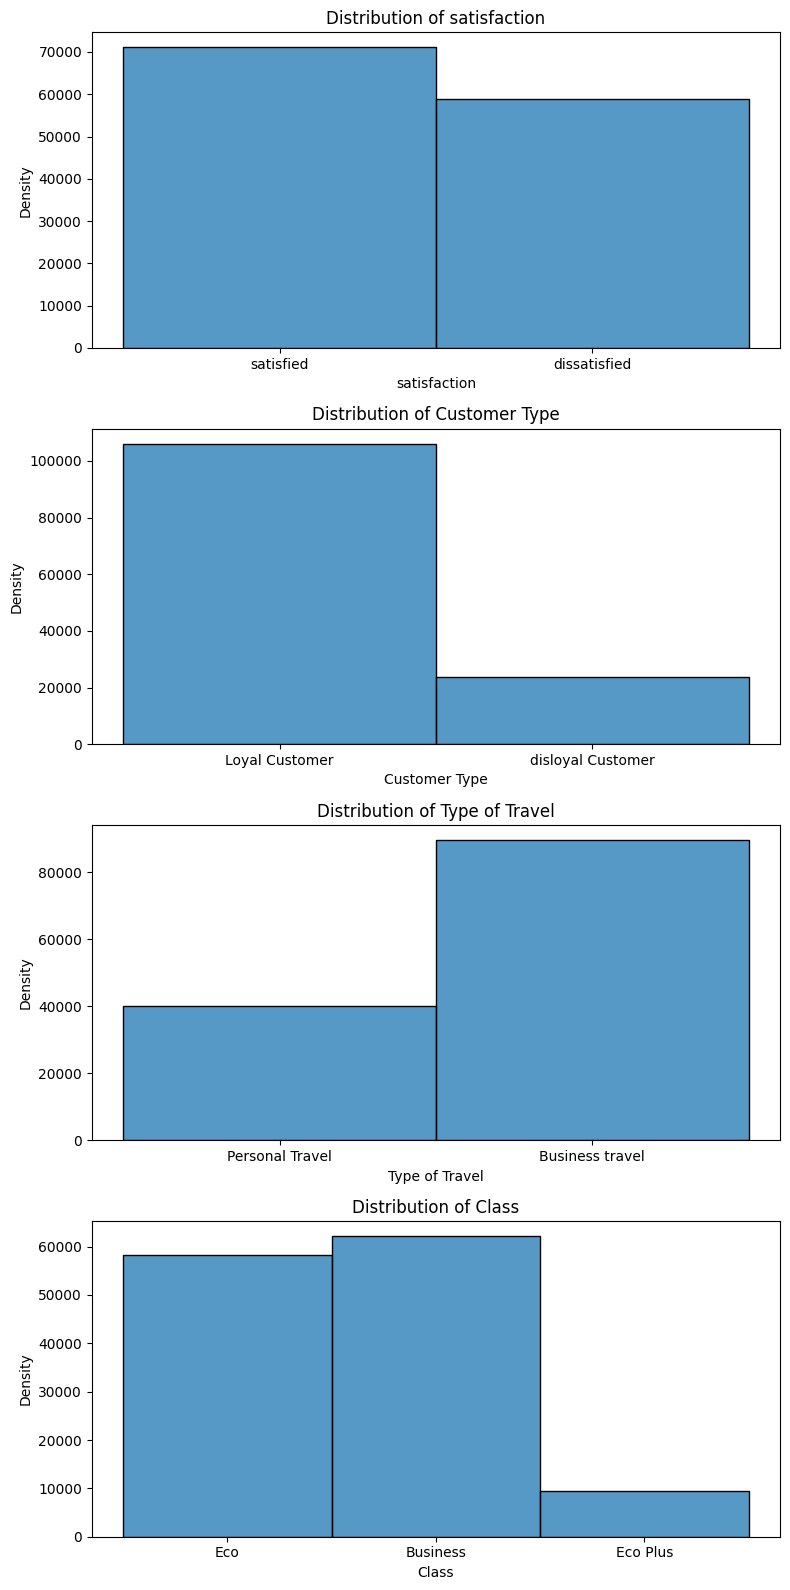

In [66]:
obj_feature_names = airline_data.select_dtypes('object').columns.tolist()


n_rows = len(obj_feature_names)
n_cols = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))

for i, feature in enumerate(obj_feature_names):
    ax = axes[i]

    sns.histplot(airline_data[feature], ax=axes[i])

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

plt.tight_layout()

plt.show()

This columns will be encoded with binary encoder(or with mappings), except for the last one(because there are 3 values for tat feature)

In [67]:
airline_data.shape[0]

129880

Let's check missing values

In [68]:
for column_name in airline_data.columns:
    print(f'Missng values in "{column_name}" column: {airline_data[column_name].isna().sum()}')

Missng values in "satisfaction" column: 0
Missng values in "Customer Type" column: 0
Missng values in "Age" column: 0
Missng values in "Type of Travel" column: 0
Missng values in "Class" column: 0
Missng values in "Flight Distance" column: 0
Missng values in "Seat comfort" column: 0
Missng values in "Departure/Arrival time convenient" column: 0
Missng values in "Food and drink" column: 0
Missng values in "Gate location" column: 0
Missng values in "Inflight entertainment" column: 0
Missng values in "Online support" column: 0
Missng values in "Ease of Online booking" column: 0
Missng values in "On-board service" column: 0
Missng values in "Leg room service" column: 0
Missng values in "Baggage handling" column: 0
Missng values in "Checkin service" column: 0
Missng values in "Cleanliness" column: 0
Missng values in "Online boarding" column: 0
Missng values in "Departure Delay in Minutes" column: 0


In [69]:
# sns.kdeplot(airline_data['Arrival Delay in Minutes'])

In the column `Arrival Delay in Minutes` also present a missing cells. We should use an imputation techniques with `most frequent` strategy.

**Exploration of target variable**

<Axes: xlabel='satisfaction', ylabel='Count'>

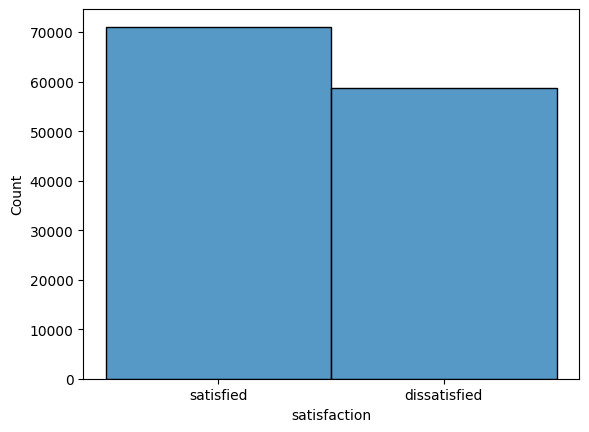

In [70]:
sns.histplot(airline_data['satisfaction'])

There's only two values in target variables, it means that our task is build an algorithm for binary classification. As we can see the data is slightly imbalanced in target variables, which could lead us to use some techinques for balancing data(oversampling/downsapling).

## Data Preprocessing

Consider all the dimensionality reduction technique types covered in the course until now. Explain how you use them, analyze their applicability.

Do not forget other preprocessing steps, like feature selection, feature engineering etc. (25% – Preproc)

Explain each step. (5% – Explain)

Data balancing

In [71]:
from sklearn.utils import resample


satisfied_samples = airline_data[airline_data['satisfaction'] == 'satisfied']
dissatisfied_samples = airline_data[airline_data['satisfaction'] == 'dissatisfied']

size = len(dissatisfied_samples)

downsampl_sat = resample(satisfied_samples, n_samples=size, random_state=42)
downsampl_data = pd.DataFrame(np.vstack((downsampl_sat, dissatisfied_samples)), columns=downsampl_sat.columns)

In [72]:
from sklearn.model_selection import train_test_split


X = downsampl_data.drop('satisfaction', axis=1)
y = downsampl_data['satisfaction']

For imputation we using a SimpleImputer with `most frequent` strategy, since the Arrival Delay in Minutes doesn't have a good distribution

In [73]:
# from sklearn.impute import SimpleImputer


# imputer = SimpleImputer(strategy='most_frequent')
# X['Arrival Delay in Minutes'] = imputer.fit_transform(np.array(X['Arrival Delay in Minutes']).reshape(-1, 1))



Let's check again the categorical features

In [74]:
obj_features = X.select_dtypes(include='object').columns.to_list()

for feature in obj_features:
    print(f'Values in {feature} column: \n{X[feature].value_counts()} \n')


Values in Customer Type column: 
Loyal Customer       94748
disloyal Customer    22838
Name: Customer Type, dtype: int64 

Values in Age column: 
39    3285
25    3272
40    2801
44    2761
41    2727
      ... 
73      58
76      51
78      45
79      45
85      21
Name: Age, Length: 75, dtype: int64 

Values in Type of Travel column: 
Business travel    80331
Personal Travel    37255
Name: Type of Travel, dtype: int64 

Values in Class column: 
Eco         54456
Business    54402
Eco Plus     8728
Name: Class, dtype: int64 

Values in Flight Distance column: 
1963    88
1812    83
1639    83
1748    81
1548    81
        ..
6232     1
5500     1
4176     1
4741     1
5523     1
Name: Flight Distance, Length: 5216, dtype: int64 

Values in Seat comfort column: 
3    27292
2    26995
4    25108
1    19347
5    14848
0     3996
Name: Seat comfort, dtype: int64 

Values in Departure/Arrival time convenient column: 
4    26880
5    24234
3    20929
2    20720
1    18758
0     6065
Name: D

Encode `Class` features with OneHotEncoder (there's also makes sense to use a ordinal encoder, since there's a probably an order in seat prices of different Classes), but for now we use this one

In [75]:
from sklearn.preprocessing import OneHotEncoder


onehot_encoder = OneHotEncoder(sparse=False)

encoded_features = onehot_encoder.fit_transform(X[['Class']].values.reshape(-1, 1))

encoded = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(['Class']))


X = pd.concat([X, encoded], axis=1)
X = X.drop(['Class'], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Here we will perform a binary encoding with mapping

In [76]:
customer_type_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}
type_of_travel_mapping = {'Business travel': 1, 'Personal Travel': 0}

X['Customer Type'] = X['Customer Type'].apply(lambda x: customer_type_mapping.get(x))
X['Type of Travel']= X['Type of Travel'].apply(lambda x: type_of_travel_mapping.get(x))


In [77]:
X.dtypes

Customer Type                          int64
Age                                   object
Type of Travel                         int64
Flight Distance                       object
Seat comfort                          object
Departure/Arrival time convenient     object
Food and drink                        object
Gate location                         object
Inflight entertainment                object
Online support                        object
Ease of Online booking                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Cleanliness                           object
Online boarding                       object
Departure Delay in Minutes            object
Class_Business                       float64
Class_Eco                            float64
Class_Eco Plus                       float64
dtype: object

In [78]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()


Customer Type       Age  Type of Travel  Flight Distance  Seat comfort  \
0            1.0  0.089744             0.0         0.481090           0.8   
1            1.0  0.538462             0.0         0.111433           0.0   
2            1.0  0.448718             1.0         0.028112           0.2   
3            1.0  0.025641             0.0         0.255036           0.8   
4            1.0  0.294872             1.0         0.433995           0.8   

   Departure/Arrival time convenient  Food and drink  Gate location  \
0                                0.4             1.0            0.8   
1                                0.6             0.0            0.4   
2                                0.2             0.2            0.2   
3                                0.8             0.8            0.8   
4                                0.8             0.8            0.8   

   Inflight entertainment  Online support  ...  On-board service  \
0                     0.4             0.4  ...               0.2   
1                     0.0             0.2  ...               0.4   
2                     0.8             1.0  ...               1.0   
3                     0.8             0.8  ...               0.4   
4                     0.8             0.8  ...               0.8   

   Leg room service  Baggage handling  Checkin service  Cleanliness  \
0               0.8              0.75              0.4          0.4   
1               0.4              1.00              0.2          0.4   
2               1.0              0.75              1.0          1.0   
3               0.2              1.00              0.6          0.2   
4               1.0              0.75              0.6          0.8   

   Online boarding  Departure Delay in Minutes  Class_Business  Class_Eco  \
0              0.4                         0.0             0.0        1.0   
1              0.2                         0.0             0.0        1.0   
2              1.0                         0.0             1.0        0.0   
3              0.8                         0.0             0.0        0.0   
4              0.8                         0.0             1.0        0.0   

   Class_Eco Plus  
0             0.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  

[5 rows x 21 columns]

## Prediction

Consider various classification models known to you, try to achieve maximum quality at the evaluation setting described above. (25% – Model quality)

Explain the model choice you've made. (5% – Explain)

First lets try to use a logistic regression without a dimensionality reduction

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import balanced_accuracy_score
import numpy as np


stratified_kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

score_lst = np.array([])

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_regression = LogisticRegression()
    log_regression.fit(X_train, y_train)
    y_pred = log_regression.predict(X_test)

    balanced_score = balanced_accuracy_score(y_test, y_pred)
    score_lst = np.append(score_lst, balanced_score)

    print(f'\n balanced accuracy score: {balanced_score} \n')

print(f'mean balanced accuracy score: {score_lst.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8317039317853354 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8254960727274411 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8311087226181508 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8262601204795577 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8279611623523367 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8310227195147493 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8244599421670352 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8384929409763565 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 balanced accuracy score: 0.8310937234223508 


 balanced accuracy score: 0.8364517775131826 

mean balanced accuracy score: 0.8304051113556496


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With PCA

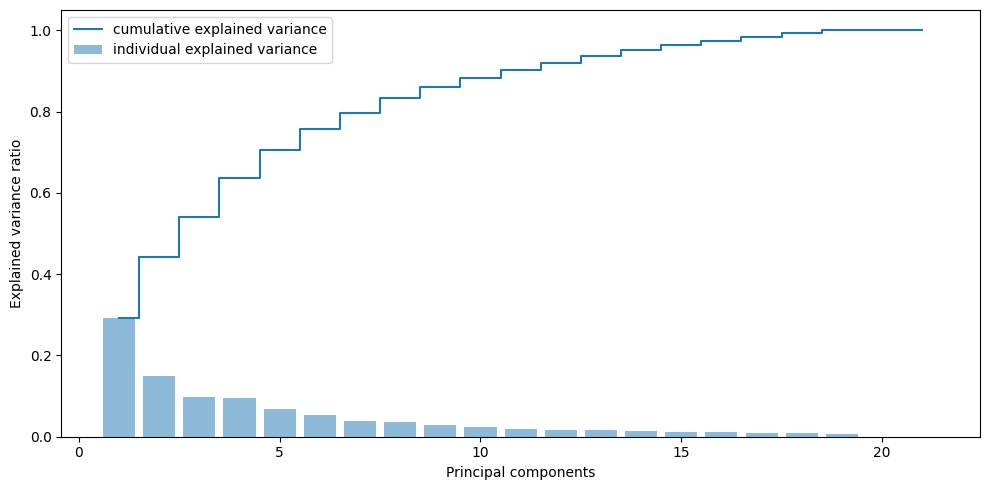

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X.shape[1])
pca.fit(X)
expl_var = pca.explained_variance_ratio_
cum_expl_var = np.cumsum(expl_var)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(expl_var) + 1), expl_var, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, len(expl_var) + 1), cum_expl_var, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From this plot we can see that there's no tail in which there could be major change in data. So PCA won't perform very good in this case.

From experimentation that we can see in the next cells we see that same logistic regression shows lower results.

In [81]:
from sklearn.decomposition import PCA

Xpca = X

pca = PCA(n_components=4)
Xpca = pd.DataFrame(pca.fit_transform(Xpca))

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

score_lst = np.array([])

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = Xpca.iloc[train_index], Xpca.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_regression = LogisticRegression()
    log_regression.fit(X_train, y_train)
    y_pred = log_regression.predict(X_test)

    balanced_score = balanced_accuracy_score(y_test, y_pred)
    score_lst = np.append(score_lst, balanced_score)

    print(f'\n balanced accuracy score: {balanced_score}\n')

print(f'mean balanced accuracy score: {score_lst.mean()}')



 balanced accuracy score: 0.7773618887936191


 balanced accuracy score: 0.7765970021279476


 balanced accuracy score: 0.7783827164136619


 balanced accuracy score: 0.7731093202717385


 balanced accuracy score: 0.769283223580298


 balanced accuracy score: 0.7749807773083719


 balanced accuracy score: 0.7705392073481885


 balanced accuracy score: 0.7791291035890457


 balanced accuracy score: 0.775472019050859


 balanced accuracy score: 0.7769178431706072

mean balanced accuracy score: 0.7751773101654338


Let's check the Performance of LDA, since our data is balanced now

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

score_lst = np.array([])

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)


    balanced_score = balanced_accuracy_score(y_test, y_pred)
    score_lst = np.append(score_lst, balanced_score)

    print(f'\n balanced accuracy score: {balanced_score} \n')

print(f'mean balanced accuracy score: {score_lst.mean()}')


 balanced accuracy score: 0.8322992422007074 


 balanced accuracy score: 0.8260914409989204 


 balanced accuracy score: 0.8322992277366806 


 balanced accuracy score: 0.8265153816246689 


 balanced accuracy score: 0.8280461529738619 


 balanced accuracy score: 0.8319581515205163 


 balanced accuracy score: 0.8241197482565062 


 balanced accuracy score: 0.8385779894539888 


 balanced accuracy score: 0.8320292566763055 


 balanced accuracy score: 0.836621874468447 

mean balanced accuracy score: 0.8308558465910603


In [84]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

score_lst = np.array([])

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    balanced_score = balanced_accuracy_score(y_test, y_pred)
    score_lst = np.append(score_lst, balanced_score)

    print(f'\n balanced accuracy score: {balanced_score} \n')

print(f'mean balanced accuracy score: {score_lst.mean()}')


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.8245619424840867 



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.8014247355686619 



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.8050867523399903 



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.8151173813631594 



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.8124843643870203 



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.7948831769482755 



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.7946079265181153 



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.8140840278959007 



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 balanced accuracy score: 0.8074502466405851 


 balanced accuracy score: 0.8094063616261269 

mean balanced accuracy score: 0.8079106915771922


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


As we can see the most performant technique was LDA and Logistic regression. It could be explained that we provided the balanced data(that we've got by removing the features with high correlation).

## Analysis

Analyze the model parameters by some method, try to explain how the service should be changed to increase the customer satisfaction. Explain it in the means of original features. (10% – Explain)

Let's use Permutation importance and analyse coefficients_

In [95]:
print(log_regression.coef_)

[[ 1.89239873 -0.62213793  0.76670753 -1.23772761  1.43103794 -1.15918227
  -1.02516607  0.64708781  3.66258051  0.51089157  0.9089187   1.59415296
   1.28284046  0.41768839  1.41236439  0.37502028  0.68119568 -8.05962967
  -4.25305984 -4.95553477 -5.03816581]]


<Axes: ylabel='Feature'>

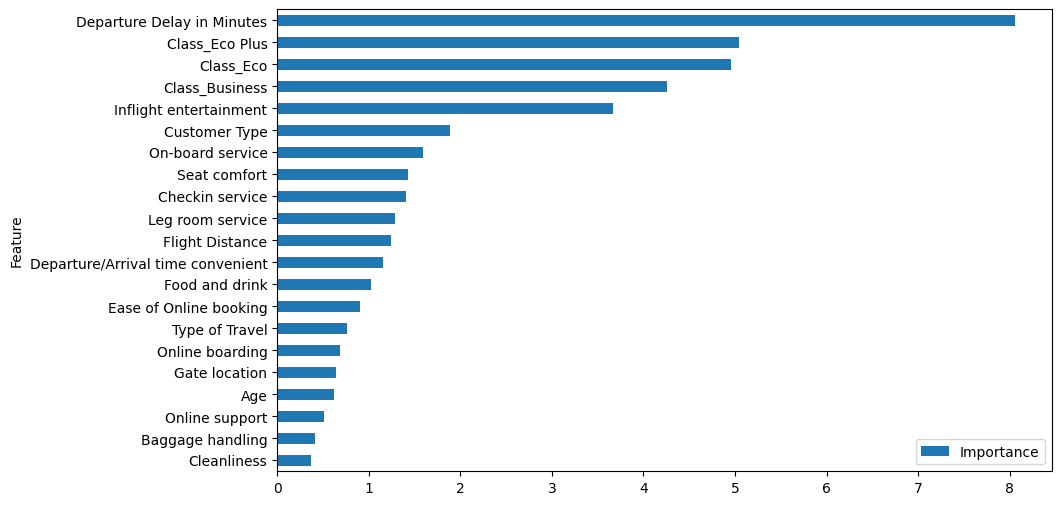

In [96]:
coefficients = log_regression.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

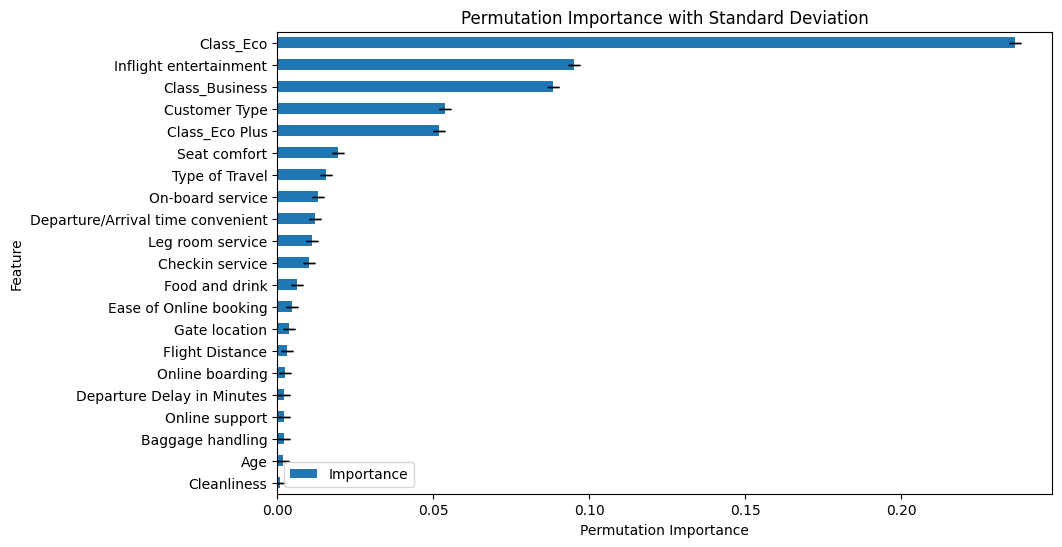

In [98]:
from sklearn.inspection import permutation_importance

result = permutation_importance(log_regression, X_test, y_test, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

From this analysis we see that `Class` is probably the most important feature of clients satisfaction. (Don't know if it is appropriate recomendation, but company should increse numbers of sales and opportunities to get better `Class` seat)
Another important feature is `Inflight entertainment`.